A bank is investigating a very high rate of customers leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.



https://drive.google.com/file/d/1fA5uR_Sb5wcsFgg3Ds27isoBVapD_GVR/view?usp=sharing

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [493]:
#Load our dataset
df=pd.read_csv("/content/drive/MyDrive/Deep Learning/Churn_Modelling.csv")


In [494]:
#describe() The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. 
#It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [495]:
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [496]:
#head () function is used to access the first n rows of a dataframe or series. It returns a smaller version of the caller object with the first few entries.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [497]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns)
df.shape

(10000, 14)

In [498]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [499]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [500]:
df.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


#Handling Missing Values

In [501]:
#Check Missing Values In The Dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Remove Unneccesary column

In [502]:
df.drop(['RowNumber','NumOfProducts'],axis=1,inplace=True)

#Visualization

**With the help of bar chart we can check how many Male and Female present in 'Gender**

Text(0.5, 0, 'Gender')

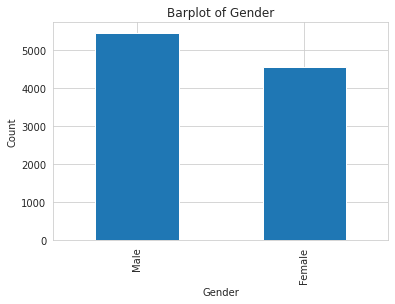

In [503]:
df_Male = df[df['Gender']=='Male']
df_Female = df[df['Gender']=='Female']
df.Gender.value_counts().plot(kind = 'bar')
plt.title("Barplot of Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

Text(0.5, 0, 'Age')

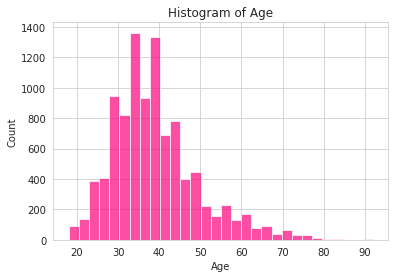

In [504]:
df['Age'].hist(bins=30,color='#fc037b',alpha=0.7)
plt.title("Histogram of Age")
plt.ylabel("Count")
plt.xlabel("Age")

Text(0.5, 0, 'Exited')

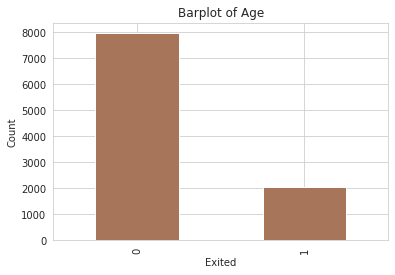

In [505]:
df.Exited.value_counts().plot(kind = 'bar',color='#a6755a')
plt.title("Barplot of Age")
plt.ylabel("Count")
plt.xlabel("Exited")

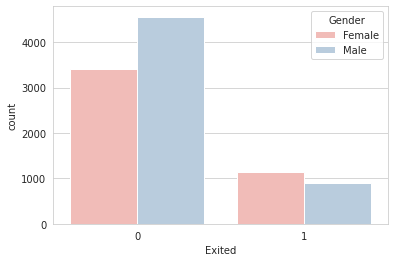

In [506]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=df,palette='Pastel1')

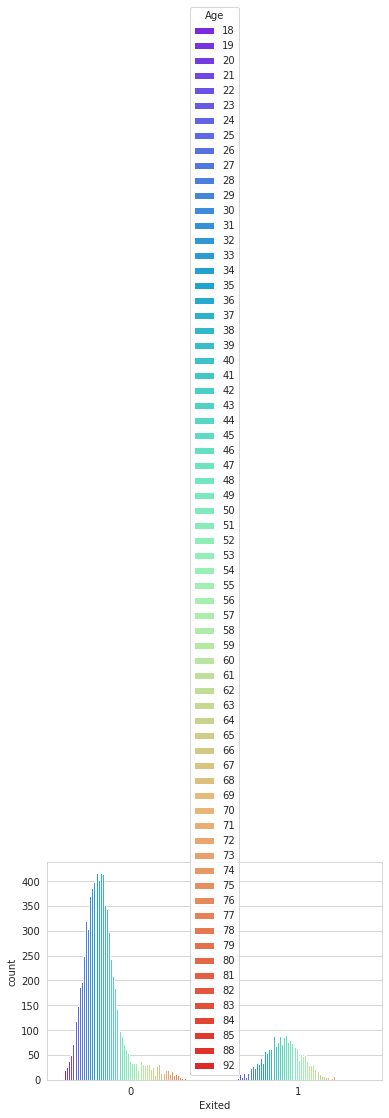

In [507]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Age',data=df,palette='rainbow')

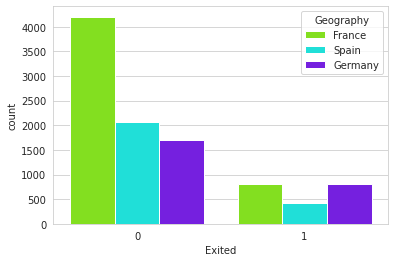

In [508]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=df,palette='hsv')

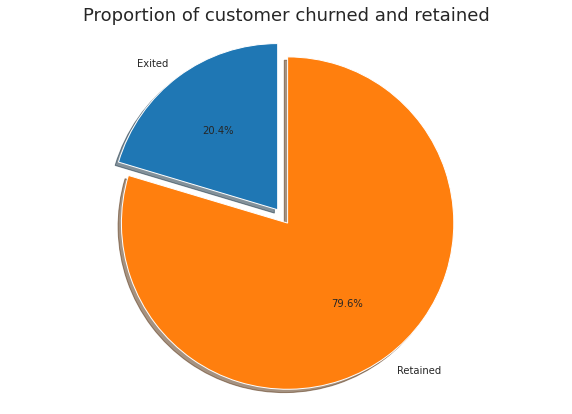

In [509]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 18)
plt.show()

# Removing Outliers

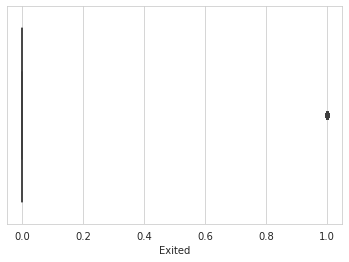

In [510]:
sns.boxplot(df['Exited'])

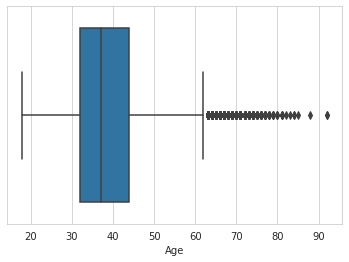

In [511]:
sns.boxplot(df['Age'])

In [512]:
np.where(df['Age']>60)

(array([  42,   44,   58,   85,  104,  158,  181,  230,  234,  243,  252,
         276,  310,  364,  371,  385,  387,  399,  416,  484,  538,  559,
         561,  567,  602,  612,  617,  630,  658,  678,  696,  736,  766,
         769,  807,  811,  823,  859,  884,  888,  921,  928,  948,  952,
         957,  963,  969,  997, 1009, 1039, 1040, 1055, 1114, 1118, 1192,
        1205, 1234, 1235, 1246, 1252, 1278, 1285, 1328, 1342, 1387, 1407,
        1410, 1433, 1439, 1457, 1519, 1543, 1588, 1607, 1614, 1642, 1790,
        1810, 1858, 1866, 1901, 1904, 1907, 1933, 1981, 1996, 2002, 2012,
        2039, 2053, 2078, 2094, 2103, 2108, 2154, 2159, 2164, 2244, 2261,
        2274, 2298, 2301, 2433, 2438, 2458, 2459, 2519, 2520, 2533, 2541,
        2553, 2599, 2615, 2659, 2670, 2713, 2717, 2760, 2772, 2777, 2778,
        2781, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3008, 3033, 3054,
        3110, 3142, 3166, 3192, 3203, 3229, 3305, 3308, 3311, 3314, 3317,
        3346, 3366, 3368, 3378, 3382, 

In [513]:
df.drop([42,   44,   58,   85,  104,  158,  181,  230,  234,  243,  252,
         276,  310,  364,  371,  385,  387,  399,  416,  484,  538,  559,
         561,  567,  602,  612,  617,  630,  658,  678,  696,  736,  766,
         769,  807,  811,  823,  859,  884,  888,  921,  928,  948,  952,
         957,  963,  969,  997, 1009, 1039, 1040, 1055, 1114, 1118, 1192,
        1205, 1234, 1235, 1246, 1252, 1278, 1285, 1328, 1342, 1387, 1407,
        1410, 1433, 1439, 1457, 1519, 1543, 1588, 1607, 1614, 1642, 1790,
        1810, 1858, 1866, 1901, 1904, 1907, 1933, 1981, 1996, 2002, 2012,
        2039, 2053, 2078, 2094, 2103, 2108, 2154, 2159, 2164, 2244, 2261,
        2274, 2298, 2301, 2433, 2438, 2458, 2459, 2519, 2520, 2533, 2541,
        2553, 2599, 2615, 2659, 2670, 2713, 2717, 2760, 2772, 2777, 2778,
        2781, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3008, 3033, 3054,
        3110, 3142, 3166, 3192, 3203, 3229, 3305, 3308, 3311, 3314, 3317,
        3346, 3366, 3368, 3378, 3382, 3384, 3387, 3396, 3403, 3434, 3462,
        3497, 3499, 3527, 3531, 3541, 3549, 3559, 3563, 3573, 3575, 3593,
        3602, 3641, 3646, 3647, 3651, 3690, 3691, 3702, 3719, 3728, 3733,
        3761, 3774, 3813, 3826, 3880, 3881, 3888, 3909, 3910, 3927, 3940,
        3947, 3980, 3994, 4010, 4025, 4048, 4051, 4095, 4142, 4147, 4157,
        4162, 4170, 4241, 4244, 4256, 4273, 4280, 4297, 4313, 4318, 4335,
        4360, 4366, 4378, 4387, 4396, 4435, 4438, 4463, 4490, 4491, 4501,
        4506, 4559, 4563, 4590, 4595, 4644, 4678, 4698, 4747, 4751, 4801,
        4815, 4832, 4849, 4931, 4947, 4966, 4992, 5000, 5020, 5033, 5038,
        5068, 5132, 5136, 5148, 5159, 5197, 5223, 5225, 5235, 5255, 5299,
        5313, 5368, 5377, 5405, 5439, 5457, 5490, 5508, 5514, 5520, 5576,
        5577, 5581, 5639, 5651, 5655, 5660, 5664, 5671, 5683, 5698, 5742,
        5777, 5783, 5817, 5825, 5840, 5867, 5907, 5957, 5996, 6046, 6116,
        6152, 6166, 6167, 6171, 6173, 6212, 6230, 6278, 6289, 6315, 6357,
        6366, 6373, 6375, 6410, 6443, 6515, 6530, 6532, 6581, 6612, 6626,
        6706, 6709, 6715, 6721, 6759, 6763, 6812, 6899, 6970, 6997, 7008,
        7057, 7058, 7063, 7071, 7078, 7094, 7138, 7139, 7142, 7156, 7194,
        7202, 7238, 7243, 7272, 7302, 7362, 7375, 7392, 7499, 7514, 7523,
        7526, 7548, 7552, 7623, 7624, 7629, 7668, 7687, 7692, 7694, 7709,
        7715, 7719, 7720, 7727, 7773, 7776, 7784, 7788, 7802, 7813, 7851,
        7894, 7898, 7909, 7933, 7956, 7995, 8019, 8037, 8094, 8098, 8156,
        8170, 8193, 8207, 8215, 8217, 8304, 8321, 8385, 8394, 8444, 8458,
        8467, 8469, 8478, 8488, 8562, 8568, 8577, 8602, 8674, 8686, 8689,
        8711, 8759, 8761, 8763, 8768, 8787, 8793, 8822, 8865, 8900, 8917,
        8930, 8970, 9018, 9021, 9062, 9080, 9102, 9112, 9116, 9162, 9174,
        9223, 9261, 9279, 9284, 9292, 9309, 9318, 9321, 9324, 9332, 9333,
        9351, 9380, 9391, 9402, 9425, 9428, 9438, 9472, 9490, 9506, 9555,
        9557, 9582, 9587, 9589, 9593, 9595, 9646, 9671, 9673, 9681, 9686,
        9688, 9718, 9733, 9734, 9736, 9747, 9753, 9765, 9832, 9879, 9894,
        9897, 9936],inplace=True)

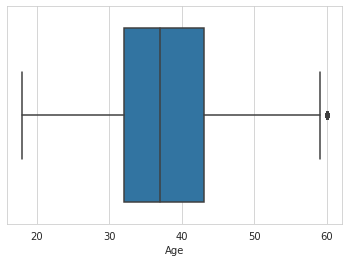

In [514]:
sns.boxplot(df['Age'])

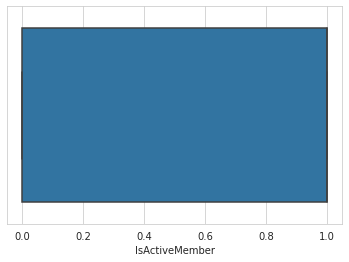

In [515]:
sns.boxplot(df['IsActiveMember'])


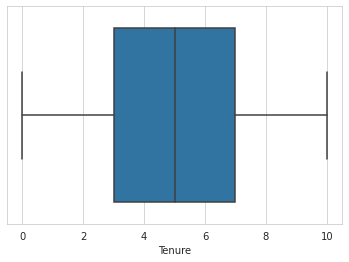

In [516]:
sns.boxplot(df['Tenure'])

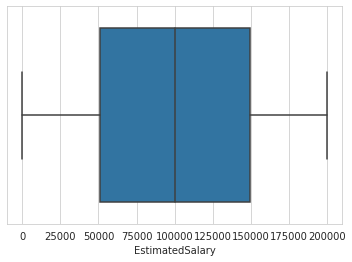

In [517]:
sns.boxplot(df['EstimatedSalary'])

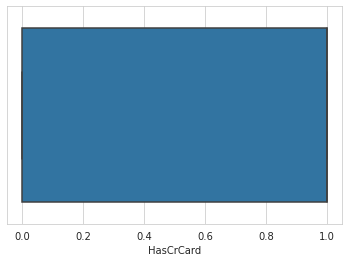

In [518]:

sns.boxplot(df['HasCrCard'])

# Handling Imbalanced Data using Resampling technique

In [519]:
#The target variable i.e Exited has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. 
df['Exited'].value_counts()

0    7614
1    1922
Name: Exited, dtype: int64

In [520]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Exited']==0)] 
df_minority = df[(df['Exited']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7614, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [521]:
df_upsampled['Exited'].value_counts()

1    7614
0    7614
Name: Exited, dtype: int64

#Scaling

Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by: It makes the training faster. It prevents the optimization from getting stuck in local optima. It gives a better error surface shape.

In [522]:
num_col=df[['CustomerId','CreditScore','Age','Balance','EstimatedSalary']]
num=df[['Tenure','HasCrCard','IsActiveMember','Exited']]
cat_col=df.select_dtypes("object").columns.to_list()

In [523]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [524]:
scaler=StandardScaler()
num_col[:]=scaler.fit_transform(num_col[:])
num_col.head()

,CustomerId,CreditScore,Age,Balance,EstimatedSalary
0,-0.783438,-0.324216,0.526407,-1.225731,0.020225
1,-0.606709,-0.438038,0.408623,0.116704,0.214873
2,-0.996170,-1.534861,0.526407,1.331717,0.239027
3,0.144805,0.503575,0.173056,-1.225731,-0.110581
4,0.652841,2.066030,0.644190,0.784702,-0.366940


# Encoding
Machine Learning model is understand only numeric value so categorical value must be converted into numeric value. 
In our dataset we have a categorical column like 'Geography' , 'Surname' and 'Gender'.

In [525]:
df['Geography'].unique() # This Geography column contain 3 categories like 'France', 'Spain', 'Germany

array(['France', 'Spain', 'Germany'], dtype=object)

In [526]:
df['Gender'].unique() # This Gender column contain 2 categories like 'Male' & 'Female'

array(['Female', 'Male'], dtype=object)

In [527]:
X_cat=pd.get_dummies(df[cat_col])
X_cat.head()


,Surname_Abazu,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# Concat the columns 

In [528]:
X_final=pd.concat([num_col,num,X_cat],axis=1)
X_final.head()

,CustomerId,CreditScore,Age,Balance,EstimatedSalary,Tenure,HasCrCard,IsActiveMember,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.783438,-0.324216,0.526407,-1.225731,0.020225,2,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,-0.606709,-0.438038,0.408623,0.116704,0.214873,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.996170,-1.534861,0.526407,1.331717,0.239027,8,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.144805,0.503575,0.173056,-1.225731,-0.110581,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.652841,2.066030,0.644190,0.784702,-0.366940,2,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


#spliting the data into training and testing

In [529]:
# Split the data into X and y variable
# X is independent variable and y is dependent variable
X=X_final.drop(['Exited'],axis=1)
y=df['Exited']

In [530]:
X.shape

(9536, 2869)

In [531]:
y.shape

(9536,)

In [532]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=1)

In [533]:
X_train.shape

(6675, 2870)

In [534]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [535]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=2870))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [536]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [537]:
history=model.fit(X_train,y_train,epochs=50,batch_size=120)

Epoch 1/50
56/56 [==============================] - 1s 7ms/step - loss: 0.4439 - accuracy: 0.8081
Epoch 2/50
56/56 [==============================] - 0s 7ms/step - loss: 0.0879 - accuracy: 0.9789
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4/50
56/56 [==============================] - 0s 7ms/step - loss: 9.5501e-04 - accuracy: 1.0000
Epoch 5/50
56/56 [==============================] - 0s 7ms/step - loss: 4.2072e-04 - accuracy: 1.0000
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 2.5016e-04 - accuracy: 1.0000
Epoch 7/50
56/56 [==============================] - 0s 7ms/step - loss: 1.5827e-04 - accuracy: 1.0000
Epoch 8/50
56/56 [==============================] - 0s 7ms/step - loss: 1.5035e-04 - accuracy: 1.0000
Epoch 9/50
56/56 [==============================] - 0s 7ms/step - loss: 9.8359e-05 - accuracy: 1.0000
Epoch 10/50
56/56 [==============================] - 0s 7ms/step - loss: 7.1767e-05 - accuracy

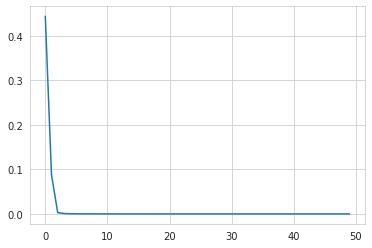

In [538]:
plt.plot(history.history['loss'])

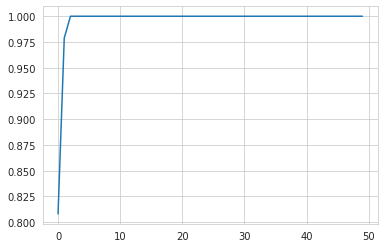

In [539]:
plt.plot(history.history['accuracy'])

In [540]:
y_pred=model.predict(X_test)
y_pred


array([[3.8226159e-07],
       [1.9148565e-08],
       [3.0423919e-08],
       ...,
       [8.6323546e-08],
       [2.4366503e-07],
       [8.0629540e-08]], dtype=float32)

In [541]:
y_pred=np.where(y_pred >=0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [542]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2321
           1       1.00      1.00      1.00       540

    accuracy                           1.00      2861
   macro avg       1.00      1.00      1.00      2861
weighted avg       1.00      1.00      1.00      2861



In [543]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  1.0
